In [1]:
pip install kaggle

In [49]:
from google.colab import files

# Upload the kaggle.json file that you downloaded earlier
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jassagill","key":"d14c074ea40512aa6583eb9f9d07426a"}'}

In [3]:
# Create the .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle

# Move the uploaded kaggle.json file to the .kaggle directory
!mv kaggle.json ~/.kaggle/

# Set the permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

DataCoSupplyChainDataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


Data preprocessing

In [18]:
np.sum(df.isna())

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [19]:
# Replace missing values in 'Customer Zipcode' and 'Order Zipcode' with 0
df['Customer Zipcode'] = df['Customer Zipcode'].fillna(0)
df['Order Zipcode'] = df['Order Zipcode'].fillna(0)

# Replace missing values in 'Customer Fname' with "NotDetermined"
df['Customer Fname'] = df['Customer Fname'].fillna("NotDetermined")

# Create 'Customer Full Name' by combining 'Customer Fname' and 'Customer Lname'
df['Customer Full Name'] = df['Customer Fname'].astype(str) + df['Customer Lname'].astype(str)

In [20]:
dfData=df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','Customer Zipcode'],axis=1)
dfData.shape

(180519, 44)

In [21]:
dfData.columns = [col.lower().replace(' ', '_') for col in dfData.columns]
dfData.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
dfData.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id',
       'order_date_dateorders', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total',
       'order_profit_per_order', 'order_region', 'order_state', 'order_status',
       'product_card_id', 'product_category_id', 'product_name',
       'product_price', 'shipping_date_dateorders', 'shipping_mode',
       'customer_full_name'],
      dtype='object')

In [22]:
Delivery=dfData.groupby('delivery_status')
Market = dfData.groupby('market')
Region = dfData.groupby('order_region')
Customer=dfData.groupby('customer_segment')
Category=dfData.groupby('category_name')
Shipping=dfData.groupby('shipping_mode')
Region=dfData.groupby('order_region')

EDA

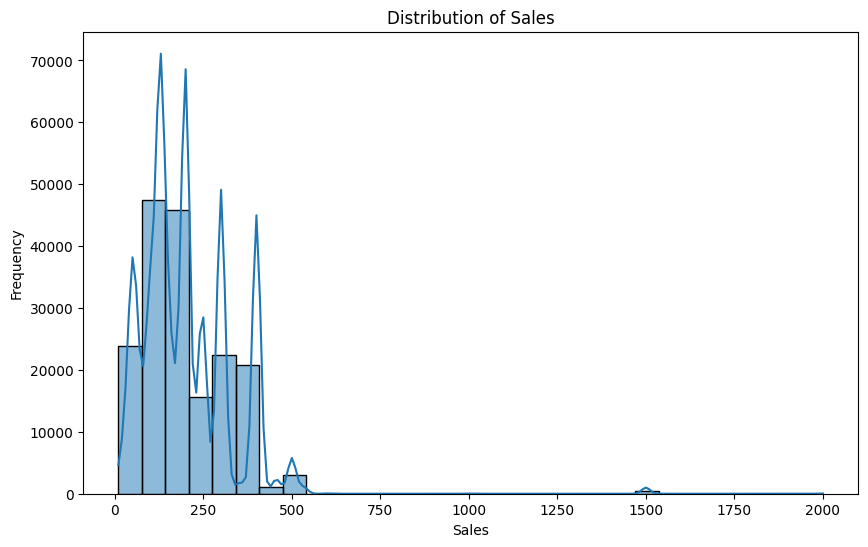

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfData, x='sales', bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [24]:
customer_segment_counts = dfData['customer_segment'].value_counts()

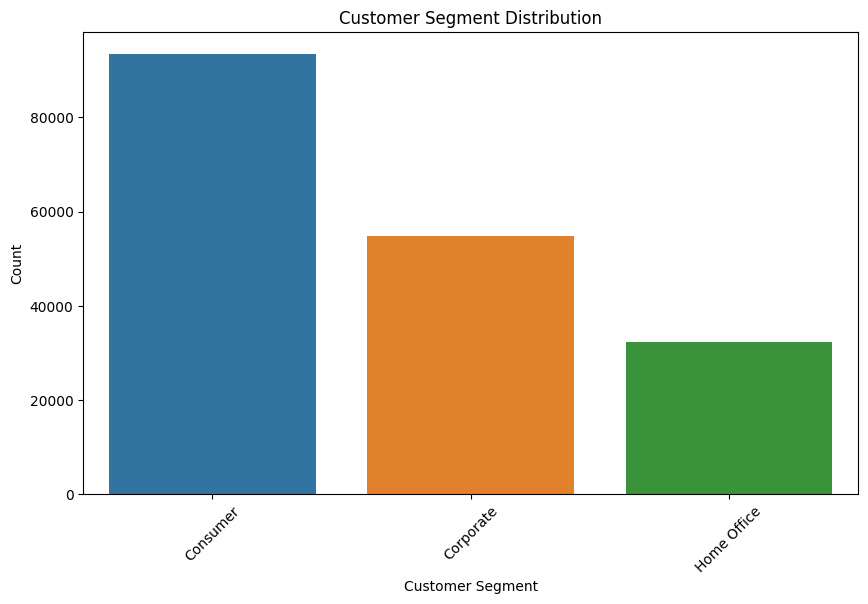

In [25]:
# Plotting Customer Segment Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_segment_counts.index, y=customer_segment_counts.values)
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

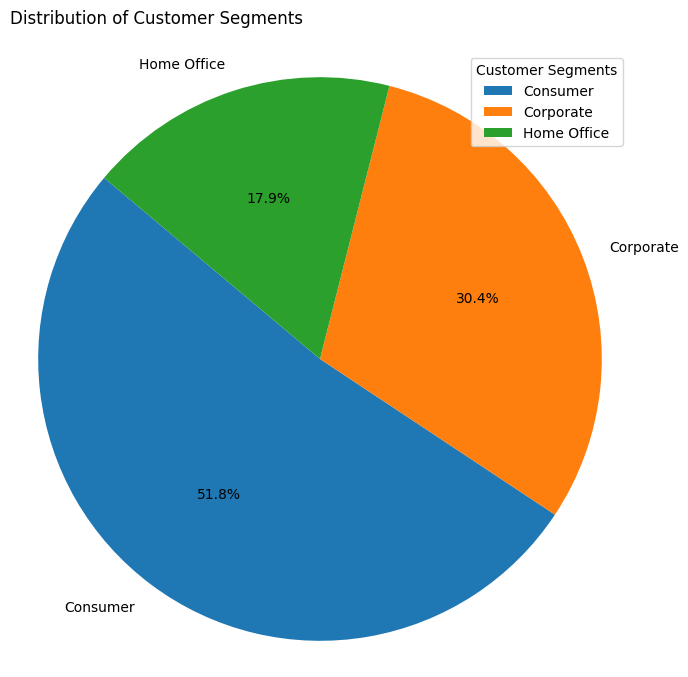

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(customer_segment_counts, labels=customer_segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Segments',loc='left', pad=20)
plt.axis('equal')
plt.legend(customer_segment_counts.index, title='Customer Segments', loc='best')
plt.show()

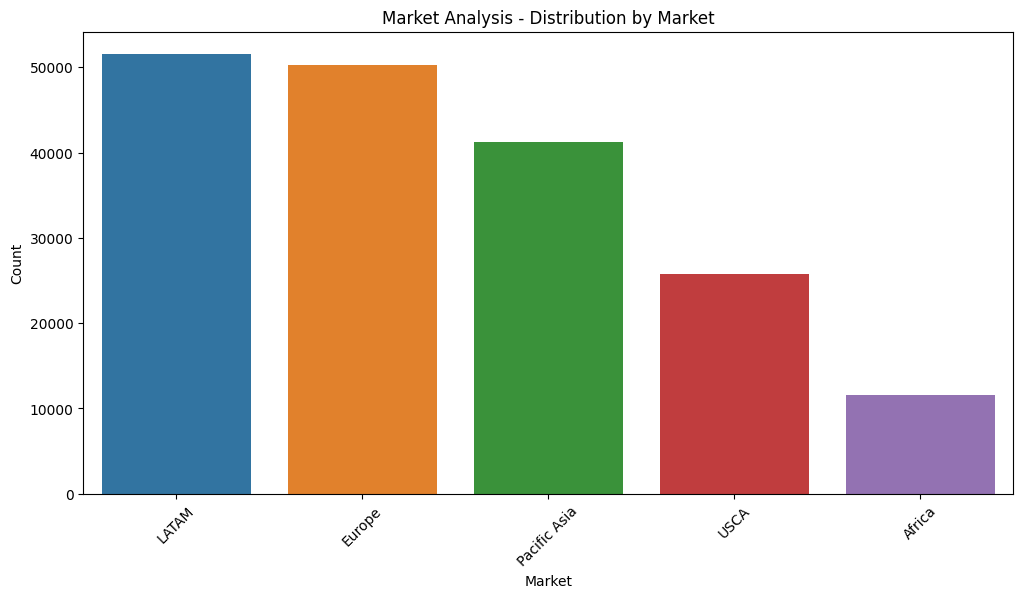

In [28]:
market_counts = dfData['market'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=market_counts.index, y=market_counts.values)
plt.title('Market Analysis - Distribution by Market')
plt.xlabel('Market')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

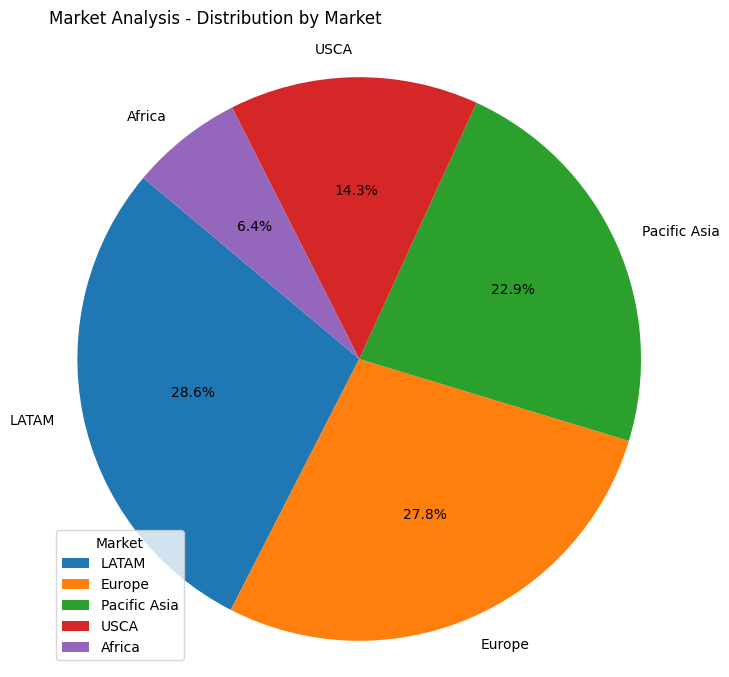

In [29]:
plt.figure(figsize=(8, 8))
plt.pie(market_counts, labels=market_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Analysis - Distribution by Market', loc='left', pad=20)
plt.axis('equal')
plt.legend(market_counts.index, title='Market', loc='best')
plt.show()

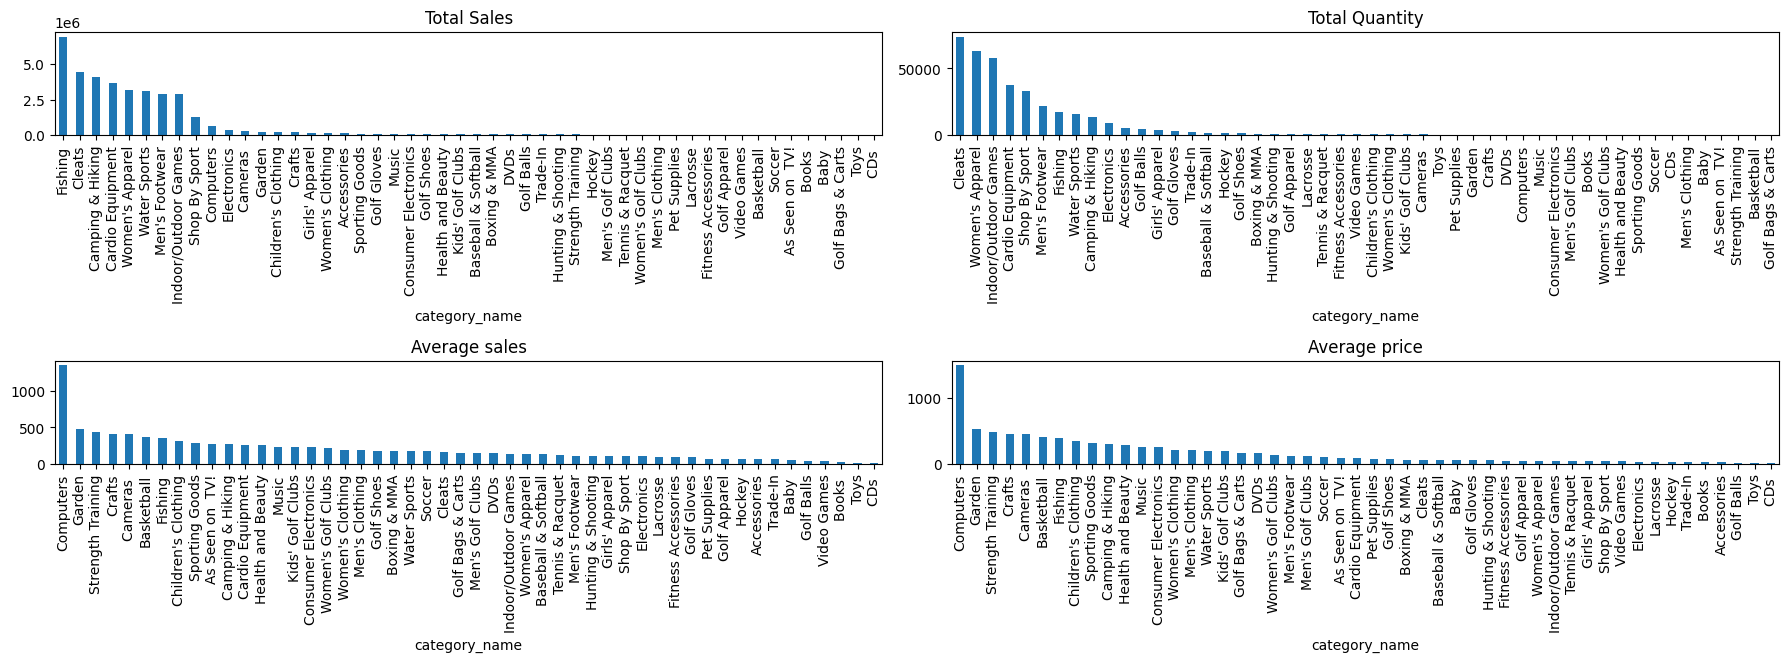

In [30]:
plt.figure(figsize=(10,12))
plt.subplot(6, 2, 1)
Category['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total Sales")

plt.subplot(6, 2, 2)
Category['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total Quantity")

plt.subplot(6, 2, 3)
Category['sales_per_customer'].mean().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Average sales")

plt.subplot(6, 2, 4)
Category['product_price'].mean().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Average price")


plt.tight_layout()
plt.show()

Delivery Status Summary:
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: delivery_status, dtype: int64


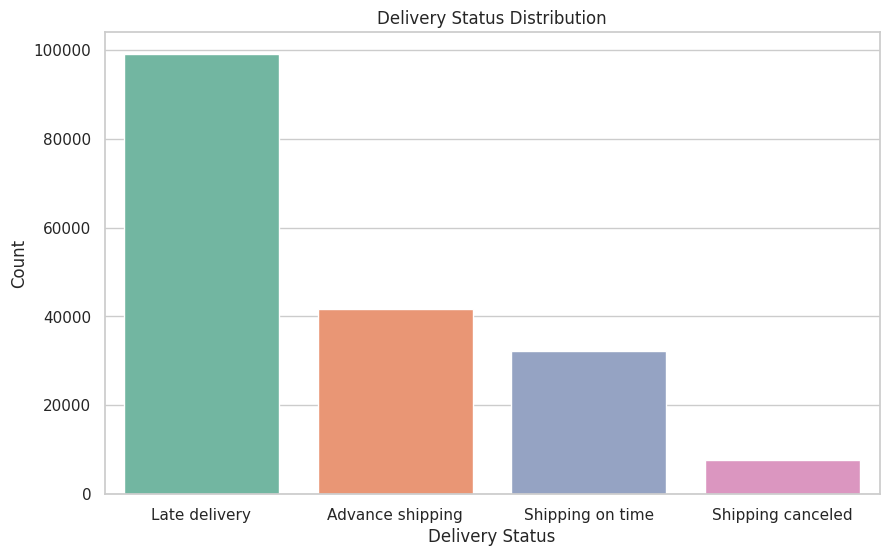

In [31]:
delivery_status_data = dfData['delivery_status']

# Summary Statistics
delivery_status_summary = delivery_status_data.value_counts()

# Visualization
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data=dfData, x='delivery_status', order=delivery_status_summary.index, palette='Set2')
plt.title('Delivery Status Distribution')
plt.xlabel('Delivery Status')
plt.ylabel('Count')

# Display summary statistics
print("Delivery Status Summary:")
print(delivery_status_summary)

In [32]:
late_deliveries = dfData[dfData['delivery_status'] == 'Late delivery']

Cross-Tabulation (Contingency Table) with Percentages:
delivery_status  Advance shipping  Late delivery  Shipping canceled  \
shipping_mode                                                         
First Class              0.000000      95.322499           4.677501   
Same Day                 0.000000      45.743042           4.559926   
Second Class             0.000000      76.632781           4.003862   
Standard Class          38.599748      38.071683           4.268134   

delivery_status  Shipping on time  
shipping_mode                      
First Class              0.000000  
Same Day                49.697032  
Second Class            19.363358  
Standard Class          19.060435  


<Figure size 1200x800 with 0 Axes>

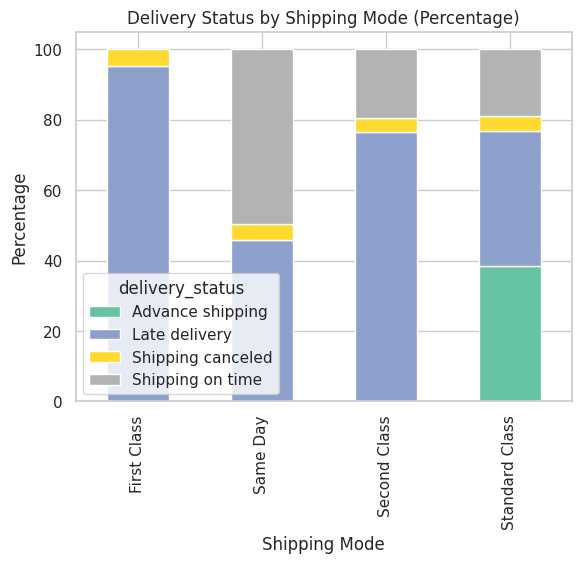

In [33]:
delivery_status_data = dfData['delivery_status']
shipping_mode_data = dfData['shipping_mode']

# Create a cross-tabulation (contingency table) to analyze the relationship
cross_tab = pd.crosstab(shipping_mode_data, delivery_status_data)

# Calculate row percentages
cross_tab_percent = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Visualize the cross-tabulation as a stacked bar chart with percentages
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
cross_tab_percent.plot(kind="bar", stacked=True, colormap='Set2')
plt.title('Delivery Status by Shipping Mode (Percentage)')
plt.xlabel('Shipping Mode')
plt.ylabel('Percentage')

# Display the cross-tabulation with percentages
print("Cross-Tabulation (Contingency Table) with Percentages:")
print(cross_tab_percent)

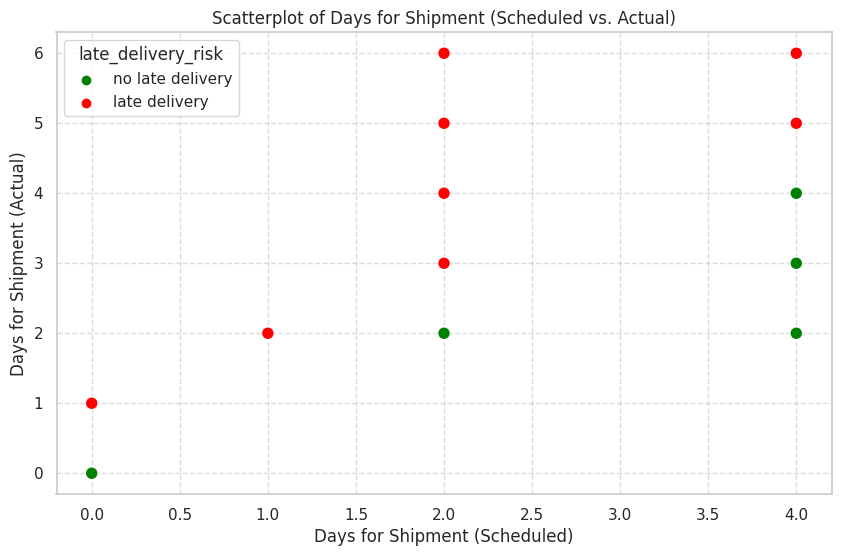

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
dfData['late_delivery_risk'] = dfData['late_delivery_risk'].map({0: 'no late delivery', 1: 'late delivery'})

palette = {'no late delivery': 'green', 'late delivery': 'red'}

scatter = sns.scatterplot(x="days_for_shipment_scheduled", y="days_for_shipping_real", hue="late_delivery_risk", data=dfData, palette=palette, s=80)
plt.title('Scatterplot of Days for Shipment (Scheduled vs. Actual)')
plt.xlabel('Days for Shipment (Scheduled)')
plt.ylabel('Days for Shipment (Actual)')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

Model train

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [36]:
train_Data = dfData.copy()

In [37]:
train_Data['late_delivery']=np.where(train_Data['delivery_status'] == 'Late delivery', 1, 0)

In [38]:
train_Data.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date_dateorders,shipping_mode,customer_full_name,late_delivery
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,no late delivery,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,late delivery,73,Sporting Goods,Caguas,...,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,no late delivery,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class,GillianMaldonado,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,no late delivery,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class,TanaTate,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,no late delivery,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class,OrliHendricks,0


In [39]:
train_data=train_Data.drop(['delivery_status','late_delivery_risk'], axis=1) #Dropping columns with repeated values

In [40]:
train_data.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,...,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date_dateorders,shipping_mode,customer_full_name,late_delivery
0,DEBIT,3,4,91.250000,314.640015,73,Sporting Goods,Caguas,Puerto Rico,20755,...,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,0
1,TRANSFER,5,4,-249.089996,311.359985,73,Sporting Goods,Caguas,Puerto Rico,19492,...,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1
2,CASH,4,4,-247.779999,309.720001,73,Sporting Goods,San Jose,EE. UU.,19491,...,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class,GillianMaldonado,0
3,DEBIT,3,4,22.860001,304.809998,73,Sporting Goods,Los Angeles,EE. UU.,19490,...,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class,TanaTate,0
4,PAYMENT,2,4,134.210007,298.250000,73,Sporting Goods,Caguas,Puerto Rico,19489,...,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class,OrliHendricks,0


In [41]:
train_data.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'category_id',
       'category_name', 'customer_city', 'customer_country', 'customer_id',
       'customer_segment', 'customer_state', 'department_id',
       'department_name', 'latitude', 'longitude', 'market', 'order_city',
       'order_country', 'order_customer_id', 'order_date_dateorders',
       'order_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_date_dateorders',
       'shipping_mode', 'customer_full_name', 'late_delivery'],
      dtype='object')

In [42]:
# List of columns to encode
columns_to_encode = [
    'customer_country', 'market', 'type', 'product_name', 'customer_segment',
    'customer_state', 'order_region', 'order_city', 'category_name',
    'customer_city', 'department_name', 'order_state', 'order_status',
    'shipping_mode', 'order_country', 'customer_full_name'
]

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode categorical columns
for col in columns_to_encode:
    train_data[col] = le.fit_transform(train_data[col])

In [43]:
data=train_data.drop(['shipping_date_dateorders','order_date_dateorders'],axis=1)

In [44]:
xlatedelivery=data .loc[:, data .columns != 'late_delivery']
ylatedelivery=data['late_delivery']
xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test = train_test_split(xlatedelivery,ylatedelivery,test_size = 0.3, random_state = 42)

In [45]:
scaler = StandardScaler()
xlatedelivery_train = scaler.fit_transform(xlatedelivery_train)
xlatedelivery_test = scaler.transform(xlatedelivery_test)

In [46]:
def classifiermodel(model_latedelivery, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test):
    model_latedelivery = model_latedelivery.fit(xlatedelivery_train, ylatedelivery_train)
    ylatedelivery_pred = model_latedelivery.predict(xlatedelivery_test)
    accuracy_latedelivery = accuracy_score(ylatedelivery_pred, ylatedelivery_test)
    recall_latedelivery = recall_score(ylatedelivery_pred, ylatedelivery_test)
    conf_latedelivery = confusion_matrix(ylatedelivery_test, ylatedelivery_pred)
    f1_latedelivery = f1_score(ylatedelivery_test, ylatedelivery_pred)
    print('Model paramters used are:', model_latedelivery)
    print('Accuracy of late delivery status is:', accuracy_latedelivery * 100, '%')
    print('Recall score of late delivery status is:', recall_latedelivery * 100, '%')
    print('F1 score of late delivery status is:', f1_latedelivery * 100, '%')
    print('Conf Matrix of late delivery status is:\n', conf_latedelivery)

In [47]:
# Initialize and train the models
model_latedelivery_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifiermodel(model_latedelivery_rf, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

model_latedelivery_svm = LinearSVC()
classifiermodel(model_latedelivery_svm, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

model_latedelivery_lr = LogisticRegression(solver='lbfgs', random_state=0)
classifiermodel(model_latedelivery_lr, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

model_latedelivery_lda = LinearDiscriminantAnalysis()
classifiermodel(model_latedelivery_lda, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

model_latedelivery_nb = GaussianNB()
classifiermodel(model_latedelivery_nb, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

Model paramters used are: RandomForestClassifier(max_depth=10, random_state=0)
Accuracy of late delivery status is: 99.7728783514292 %
Recall score of late delivery status is: 99.58818802732021 %
F1 score of late delivery status is: 99.79366916612149 %
Conf Matrix of late delivery status is:
 [[24288   123]
 [    0 29745]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model paramters used are: LinearSVC()
Accuracy of late delivery status is: 98.25688751015585 %
Recall score of late delivery status is: 96.93315516735652 %
F1 score of late delivery status is: 98.4378102866221 %
Conf Matrix of late delivery status is:
 [[23470   941]
 [    3 29742]]
Model paramters used are: LogisticRegression(random_state=0)
Accuracy of late delivery status is: 98.24950144028362 %
Recall score of late delivery status is: 96.93275530493172 %
F1 score of late delivery status is: 98.43108698530386 %
Conf Matrix of late delivery status is:
 [[23470   941]
 [    7 29738]]
Model paramters used are: LinearDiscriminantAnalysis()
Accuracy of late delivery status is: 96.20540660314647 %
Recall score of late delivery status is: 96.25793518209154 %
F1 score of late delivery status is: 96.55634687892753 %
Conf Matrix of late delivery status is:
 [[23291  1120]
 [  935 28810]]
Model paramters used are: GaussianNB()
Accuracy of late delivery status is: 84.98227343230667 %
Recall sco

In [48]:
# Create a DataFrame to compare classification results
Classification_data = {
    'Classification Model': ['Random Forest Classification', 'Support Vector Machines', 'Logistic Classification Model',
                             'Linear Discriminant Analysis', 'Gaussian Naive Bayes Model'],
    'Accuracy': [99.44419824211536, 98.25688751015585, 98.24950144028362, 96.20540660314647, 94.58416426619397],
    'Recall': [98.99820275577447, 96.93315516735652, 96.93275530493172, 96.25793518209154, 91.21879227647275],
    'F1': [99.4965797528056, 98.4378102866221, 98.43108698530386, 96.55634687892753, 95.28979106778654],
    'TN': [24110, 23470, 23470, 23291, 21555],
    'FP': [301, 941, 941, 1120, 2856],
    'FN': [0, 3, 7, 935, 77],
    'TP': [29745, 29742, 29738, 28810, 29668]
}

Classification_comparision = pd.DataFrame(Classification_data, columns=['Classification Model', 'Accuracy', 'Recall', 'F1', 'TN', 'FP', 'FN', 'TP'])

Classification_comparision

,Classification Model,Accuracy,Recall,F1,TN,FP,FN,TP
0,Random Forest Classification,99.444198,98.998203,99.496580,24110,301,0,29745
1,Support Vector Machines,98.256888,96.933155,98.437810,23470,941,3,29742
2,Logistic Classification Model,98.249501,96.932755,98.431087,23470,941,7,29738
3,Linear Discriminant Analysis,96.205407,96.257935,96.556347,23291,1120,935,28810
4,Gaussian Naive Bayes Model,94.584164,91.218792,95.289791,21555,2856,77,29668


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(Classification_comparision, *['Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(Classification_comparision, *['Recall'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(Classification_comparision, *['F1'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(Classification_comparision, *['TN'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(Classification_comparision, *['Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(Classification_comparision, *['Recall'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(Classification_comparision, *['F1'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(Classification_comparision, *['TN'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(Classification_comparision, *['Classification Model'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(Classification_comparision, *[[['Accuracy', 'Recall'], ['Recall', 'F1'], ['F1', 'TN'], ['TN', 'FP']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(Classification_comparision, *['Accuracy', 'Classification Model'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(Classification_comparision, *['Recall', 'Classification Model'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(Classification_comparision, *['F1', 'Classification Model'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(Classification_comparision, *['TN', 'Classification Model'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(Classification_comparision, *['FP', 'Accuracy', 'Classification Model'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(Classification_comparision, *['FP', 'Recall', 'Classification Model'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(Classification_comparision, *['FP', 'F1', 'Classification Model'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(Classification_comparision, *['FP', 'TN', 'Classification Model'], **{})
chart